# Работа 2. Анализ устойчивости

## 1. Система

$4. (1 + b p) x = c (1 + a p) y$,  
$b, c$ - константы, $a$ - меняющийся параметр

## 2. Передаточная функция

$W(s) = \frac{1 + b s}{c (1 + a s)}$

## 3. Исследование устойчивости системы

### Критерий Гурвица

Представим передаточную функцию в виде  
    $W(s) = \frac{Y(s)}{U(s)}, Y(s) = \frac{1}{c} (1 + b s), U(s) = a s + 1$  

Тогда согласно критерию Гурвица, устойчивость системы равносильна $\Delta_1 = 1 > 0, a > 0$; т.е. просто $a > 0$

### Критерий Рауса

Запишем матрицу ($Y(s)$ и $U(s)$ те же, что и в предыдущем пункте):  
$$
\begin{equation*}
C = \left(\begin{array}{c} 
a \\
1
\end{array}\right)
\end{equation*}
$$  

Согласно критерию, система устойчива тогда и только тогда, когда все элементы первого столбца матрицы положительны; т.е. получаем: $a > 0$

## 4. Поведение полюсов в зависимости от параметра

Примем $b = 1, c = 2$

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [11]:
b, c = 1, 2

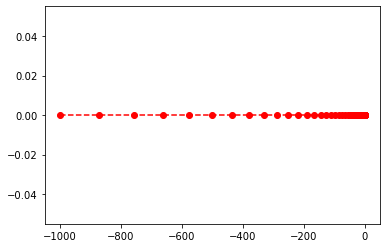

For R==0.001 P==(-1000.000, 0.000)
For R==0.004 P==(-251.189, 0.000)
For R==0.016 P==(-63.096, 0.000)
For R==0.063 P==(-15.849, 0.000)
For R==0.251 P==(-3.981, 0.000)
For R==1.000 P==(-1.000, 0.000)
For R==3.981 P==(-0.251, 0.000)
For R==15.849 P==(-0.063, 0.000)
For R==63.096 P==(-0.016, 0.000)
For R==251.189 P==(-0.004, 0.000)
For R==1000.000 P==(-0.001, 0.000)


In [13]:
# создаём набор точек, равномерно распределенных в логарифмическом масштабе
p_num = 101
param = np.logspace(-3, 3, p_num)

# массив для значений полюса
pole = np.empty(p_num)

# для каждого значения параметра рассчитываем положение полюса
for i in range(p_num):
    z,p,k = signal.tf2zpk([b, 1], [c*param[i], c])
    pole[i] = p[0]

# строим график
fg,ax = plt.subplots()
ax.plot(np.real(pole), np.imag(pole),'ro--')
plt.show()

# часть результатов в текстовом виде
for i in range(0,p_num,10):
    print('For R=={0:.3f} P==({1:.3f}, {2:.3f})'.format(param[i],pole[i].real, pole[i].imag))

## 5. Реакция системы

### Устойчивый случай

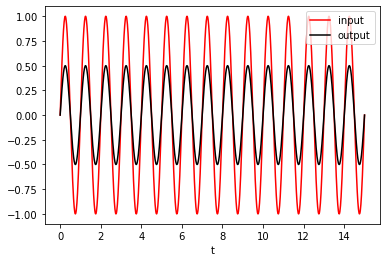

In [14]:
# задаём значение параметра, соответствующее устойчивости системы
a = 1.0

# задаём систему
sys = signal.lti([b, 1], [c*a, c])

# задаём временной интервал
t = np.linspace(0, 15.0, 1001)
# задаём входной сигнал;
sig = np.sin(2*np.pi*t)
# пропускаем через систему
tout, yout, xout = signal.lsim(sys, sig, t)
# выводим входной и выходной сигналы
plt.figure()
plt.plot(t, sig, color='red', label='input')
plt.plot(tout, yout, color='black', label='output')
plt.legend(loc=0)
plt.xlabel('t')
plt.show()

### Неустойчивый случай

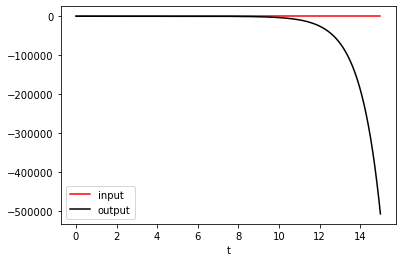

In [16]:
# задаём значение параметра, соответствующее неустойчивости системы
a = -1.0

# задаём систему
sys = signal.lti([b, 1], [c*a, c])

# задаём временной интервал
t = np.linspace(0, 15.0, 1001)
# задаём входной сигнал;
sig = np.sin(2*np.pi*t)
# пропускаем через систему
tout, yout, xout = signal.lsim(sys, sig, t)
# выводим входной и выходной сигналы
plt.figure()
plt.plot(t, sig, color='red', label='input')
plt.plot(tout, yout, color='black', label='output')
plt.legend(loc=0)
plt.xlabel('t')
plt.show()

## 6. Частотные характеристики

### Устойчивый случай

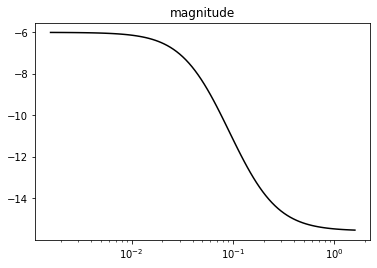

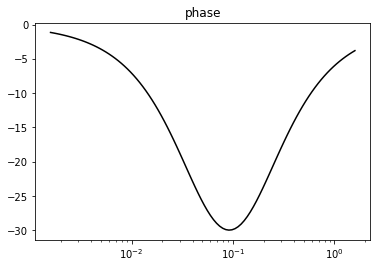

In [19]:
# задаём значение параметра, соответствующее устойчивости системы
a = 3.0

# задаём систему
sys = signal.lti([b, 1], [c*a, c])

# создаём диаграмму Боде
w, mag, phase = signal.bode(sys)
# переводим циклическую частоту в обычную
fs = w / 2 / np.pi

# рисуем график амплитудно-частотной характеристики
plt.figure()
plt.semilogx(fs, mag, color='black')
plt.title('magnitude')
# график фазово-частотной характеристики
plt.figure()
plt.semilogx(fs, phase, color='black')
plt.title('phase')
plt.show()

### Неустойчивый случай

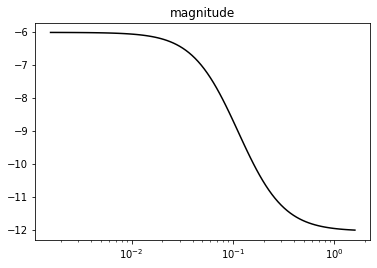

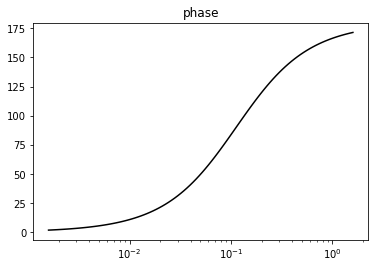

In [23]:
# задаём значение параметра, соответствующее неустойчивости системы
a = -2.0

# задаём систему
sys = signal.lti([b, 1], [c*a, c])

# создаём диаграмму Боде
w, mag, phase = signal.bode(sys)
# переводим циклическую частоту в обычную
fs = w / 2 / np.pi

# рисуем график амплитудно-частотной характеристики
plt.figure()
plt.semilogx(fs, mag, color='black')
plt.title('magnitude')
# график фазово-частотной характеристики
plt.figure()
plt.semilogx(fs, phase, color='black')
plt.title('phase')
plt.show()

АЧХ и ФЧХ определяют изменение амплитуды и фазы при переходе от входного сигнала к выходному установившемуся; само понятие установившегося сигнала использует свойство устойчивости (лишние составляющие выходного сигнала устойчивой системы экспоненциально убывают; в неустойчивом случае такого не происходит, поэтому выходной сигнал сильно зависит от начальных условий). Поэтому для неустойчивой системы АЧХ и ФЧХ не имеют особого смысла.

## 7. Система с отрицательной обратной связью

Добавим в систему отрицательную обратную связь с передаточной функцией  
    $W_0(s) = - \frac{(c a - 1) s - a^2 - 1 + c}{1 + b s}$,  

Тогда передаточная функция всей системы равна  
    $W(s) = \frac{b s + 1}{s + a^2 + 1}$

### Устойчивость системы

Критерий Гурвица: $1 > 0, \Delta_1 = a^2 + 1 > 0$; т.е. система устойчива при любых $a$  
Критерий Рауса:  
$$
\begin{equation*}
C = \left(\begin{array}{c} 
1 \\
a^2 + 1
\end{array}\right)
\end{equation*};  
1 > 0, a^2 + 1 > 0
$$  
Равносильно, система устойчива при любых $a$

### Поведение полюсов в зависимости от параметра

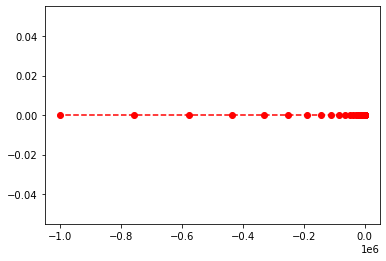

For R==0.001 P==(-1.000, 0.000)
For R==0.004 P==(-1.000, 0.000)
For R==0.016 P==(-1.000, 0.000)
For R==0.063 P==(-1.004, 0.000)
For R==0.251 P==(-1.063, 0.000)
For R==1.000 P==(-2.000, 0.000)
For R==3.981 P==(-16.849, 0.000)
For R==15.849 P==(-252.189, 0.000)
For R==63.096 P==(-3982.072, 0.000)
For R==251.189 P==(-63096.734, 0.000)
For R==1000.000 P==(-1000001.000, 0.000)


In [25]:
p_num = 101
param = np.logspace(-3, 3, p_num)

# массив для значений полюса
pole = np.empty(p_num)

# для каждого значения параметра рассчитываем положение полюса
for i in range(p_num):
    z,p,k = signal.tf2zpk([b, 1], [1, np.power(param[i], 2) + 1])
    pole[i] = p[0]

# строим график
fg,ax = plt.subplots()
ax.plot(np.real(pole), np.imag(pole),'ro--')
plt.show()

# часть результатов в текстовом виде
for i in range(0,p_num,10):
    print('For R=={0:.3f} P==({1:.3f}, {2:.3f})'.format(param[i],pole[i].real, pole[i].imag))

### Реакция системы

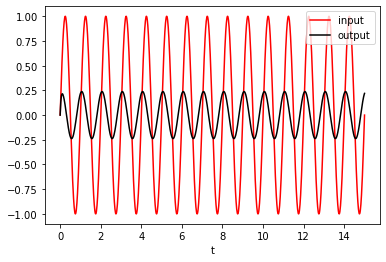

In [29]:
# задаём значение параметра
a = 5.0

# задаём систему
sys = signal.lti([b, 1], [1, np.power(a, 2) + 1])

# задаём временной интервал
t = np.linspace(0, 15.0, 1001)
# задаём входной сигнал;
sig = np.sin(2*np.pi*t)
# пропускаем через систему
tout, yout, xout = signal.lsim(sys, sig, t)
# выводим входной и выходной сигналы
plt.figure()
plt.plot(t, sig, color='red', label='input')
plt.plot(tout, yout, color='black', label='output')
plt.legend(loc=0)
plt.xlabel('t')
plt.show()

### Частотные характеристики

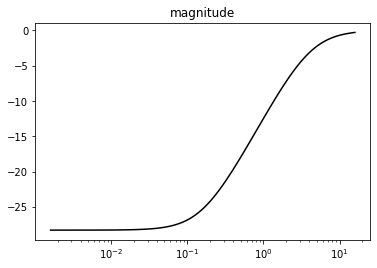

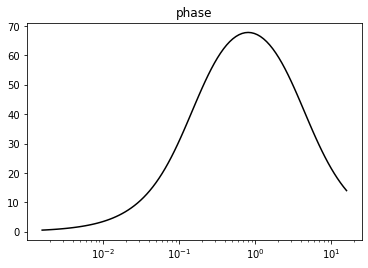

In [30]:
# задаём значение параметра
a = 5.0

# задаём систему
sys = signal.lti([1, 1], [1, np.power(a, 2) + 1])

# создаём диаграмму Боде
w, mag, phase = signal.bode(sys)
# переводим циклическую частоту в обычную
fs = w / 2 / np.pi

# рисуем график амплитудно-частотной характеристики
plt.figure()
plt.semilogx(fs, mag, color='black')
plt.title('magnitude')
# график фазово-частотной характеристики
plt.figure()
plt.semilogx(fs, phase, color='black')
plt.title('phase')
plt.show()

Итог: обратная связь влияет как на устойчивость системы (система стала устойчивой), так и на частотные характеристики